#Build a CNN using TensorFlow and Keras with Synthetic Image Data

#1️⃣ Import Libraries

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#2️⃣ Generate Synthetic Classification Data

In [20]:
# Generate 1000 synthetic grayscale images (28x28) with 2 classes
num_samples = 1000
img_height, img_width = 28, 28

# Create random image data with pixel values between 0 and 1
X = np.random.rand(num_samples, img_height, img_width, 1)

# Generate synthetic binary labels (0 or 1)
y = np.random.randint(0, 2, size=(num_samples,))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#3️⃣ Build the CNN Model

In [21]:
# Build a simple CNN architecture
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Max pooling to reduce spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the output from 2D to 1D
model.add(Flatten())

# Dense layer (fully connected)
model.add(Dense(64, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#4️⃣ Compile the Model

In [22]:
# Compile the CNN model
model.compile(
    optimizer='adam',                  # Adam optimizer
    loss='binary_crossentropy',        # Binary classification loss
    metrics=['accuracy']               # Monitor accuracy
)


#5️⃣ Train the Model

In [23]:
# Train the model on the synthetic data
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,                # Number of epochs
    batch_size=32,            # Batch size for each gradient update
    verbose=1                 # Show progress
)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5354 - loss: 0.7291 - val_accuracy: 0.5100 - val_loss: 0.6961
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5251 - loss: 0.6912 - val_accuracy: 0.5050 - val_loss: 0.6925
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5208 - loss: 0.6869 - val_accuracy: 0.5100 - val_loss: 0.6926
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6529 - loss: 0.6741 - val_accuracy: 0.5100 - val_loss: 0.6980
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6023 - loss: 0.6569 - val_accuracy: 0.5150 - val_loss: 0.6951
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7769 - loss: 0.6257 - val_accuracy: 0.5050 - val_loss: 0.6984
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7829 - loss: 0.5856 - val_accuracy: 0.5050 - val_loss: 0.6964
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8370 - loss: 0.5389 - val_accuracy: 0.5000 - v

#6️⃣ Evaluate the Model

In [24]:
# Evaluate model performance on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 53.00%


#7️⃣  Plot Accuracy and Loss Graphs

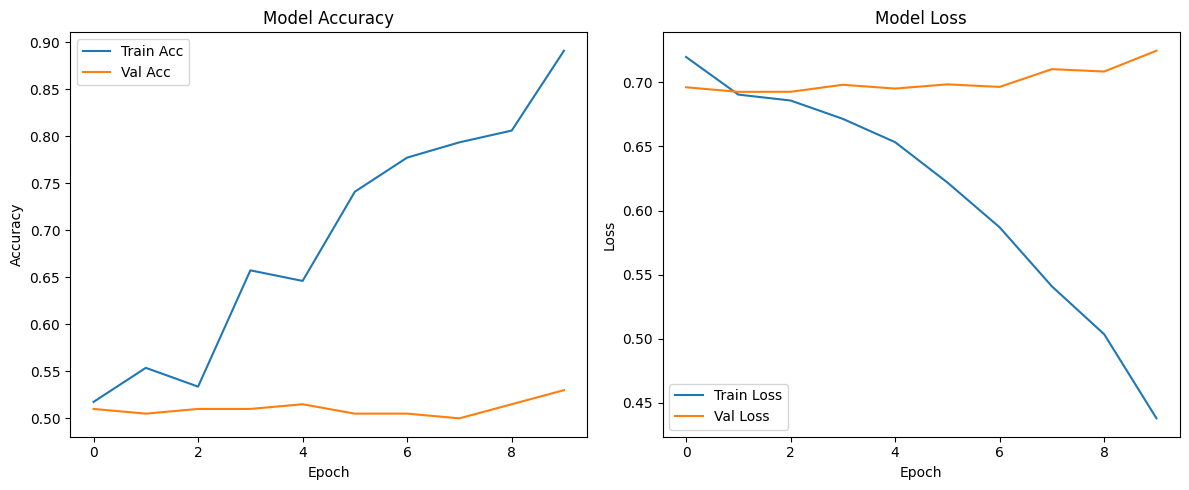

In [25]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#8️⃣ Make Predictions on Test Data

In [26]:
# Predict probabilities
pred_probs = model.predict(X_test)

# Convert to class labels (threshold 0.5)
pred_classes = (pred_probs > 0.5).astype(int)

# Show a few predictions
print("Predicted:", pred_classes[:10].ravel())
print("Actual   :", y_test[:10])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted: [1 0 1 0 1 0 0 0 0 0]
Actual   : [0 0 1 1 0 0 0 0 0 0]


#🧠 Summary

- We successfully built a basic CNN model using TensorFlow and Keras.
- Synthetic image data was used to simulate grayscale classification.
- This pipeline can be scaled up to work with real datasets like MNIST, CIFAR, etc.
